![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
import os
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [6]:

path = os.getcwd() + "/drive/My Drive/Project-10/ACV-Project-2 Datatset-20201018T214348Z-001/ACV-Project-2 Datatset"

os.chdir(path)
#get the current working directory and change current working directory to project folder.  

path
#'D:\\Nisha\\Machine Learning\\GL\\Projects\\Project-10\\ACV-Project-2 Datatset-20201018T214348Z-001\\ACV-Project-2 Datatset'

'/content/drive/My Drive/Project-10/ACV-Project-2 Datatset-20201018T214348Z-001/ACV-Project-2 Datatset'

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [96]:

Extracting all the files from the zip file.
from zipfile import ZipFile 
with ZipFile("Aligned Face Dataset.zip", 'r') as zip:     
     zip.extractall()
     print("Extraction completed")
    


Extraction completed


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('./Aligned Face Dataset/PINS')

### Define function to load image
- Define a function to load image from the metadata

In [69]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
     #If image is not present, then filling with 2622 zeroes.
    if img is not None:  
      #print(img)
      #print(img.shape)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
      img = np.zeros(((2622,2622,3)))
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [97]:

ig = load_image("./Aligned Face Dataset/PINS/pins_Aaron Paul/Aaron Paul74_211.jpg")
#ig = load_image("./Aligned Face Dataset/PINS/pins_barbara palvin face/barbara palvin face31.jpg") - Faced issue, used for testing when images are not available.
ig.shape

(295, 299, 3)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [13]:
#Loading the model defined above and it's weight.
model = vgg_face()
model.load_weights("vgg_face_weights.h5")



### Get vgg_face_descriptor

In [14]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output) #Passing input and output for the model

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [15]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [70]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    print("i=", i, "m = ",m)
    img_path = m.image_path()
    print(img_path)
    
    img = load_image(img_path) # Read image, included filling the 2622-zeroes when there is error in reading image in the load_image () 
    
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
   


Streaming output truncated to the last 5000 lines.
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke14_999.jpg
i= 4215 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke17_902.jpg
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke17_902.jpg
i= 4216 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke176_889.jpg
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke176_889.jpg
i= 4217 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke94_926.jpg
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke94_926.jpg
i= 4218 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke97_955.jpg
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke97_955.jpg
i= 4219 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke193_1023.jpg
./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke193_1023.jpg
i= 4220 m =  ./Aligned Face Dataset/PINS/pins_Emilia Clarke/Emilia Clarke144_886.jpg
./Aligned Fa

In [20]:
img_path

'./Aligned Face Dataset/PINS/pins_barbara palvin face/barbara palvin face31.jpg'

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [71]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

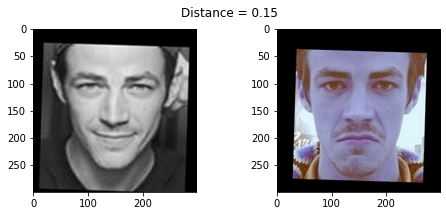

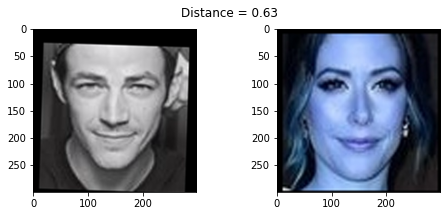

In [72]:
import matplotlib.pyplot as plt

#Finding distance between similar and dissimilar faces using squared L2 distance
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

#First pair shows that both faces looks approx close/similar as distance is 0.15
#Second pair shows that likeliness that both faces looks dissimilar as distance is  0.63

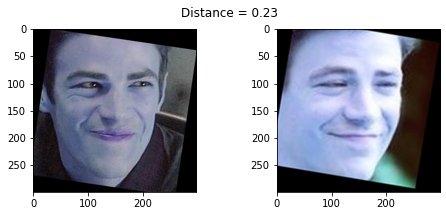

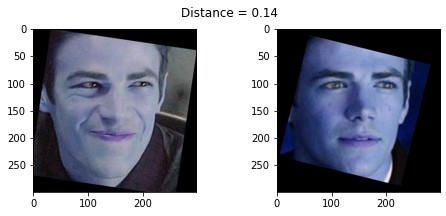

In [101]:
show_pair(30, 31)
show_pair(30, 100)

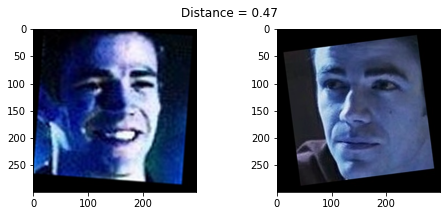

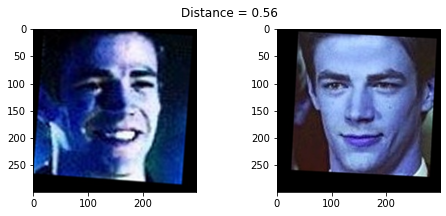

In [102]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [90]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])   #labels for y_train and y_test.  moved y_train and y_test to be done after label encoding on targets. 


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
targets = le.fit_transform(targets)

#### Add your code here ####
#train labels
y_train = targets[train_idx]      
#test labels
y_test = targets[test_idx]
#### Add your code here ####

In [93]:
y_train

array([52, 52, 52, ..., 34, 34, 34])

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [82]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_Xtrain = sc.fit_transform(X_train)
Scaled_Xtest = sc.transform(X_test)

#### Add your code here ####

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [85]:
from sklearn.decomposition import PCA

#### Add your code here ####
pca = PCA(n_components = 128)
pca_Xtrain = pca.fit_transform(Scaled_Xtrain)
pca_Xtest = pca.transform(Scaled_Xtest)

In [99]:
#Printing the principal components
print("PCA Components")
print(pca.components_)
print("Expalined_Variance")
print(pca.explained_variance_)
print("PCA Explained Variance Ratio")
print(pca.explained_variance_ratio_)

PCA Components
[[-2.37120576e-02  6.32123183e-03 -7.41749944e-03 ... -7.75847106e-03
   2.06306986e-02  3.74636577e-02]
 [ 1.88587986e-02  6.56871389e-03  1.24218755e-02 ... -2.39620946e-02
   2.57350330e-03  1.85377207e-02]
 [ 8.97639883e-03 -3.61558773e-03 -2.16569508e-02 ... -1.95654204e-02
  -1.88946021e-02 -2.40319345e-02]
 ...
 [-6.72819797e-02 -1.17966866e-02  1.22538386e-02 ... -1.16486162e-03
  -1.75942943e-02  2.81569372e-05]
 [ 2.68460702e-02  8.66538918e-03 -1.85865270e-02 ... -2.59831258e-02
  -1.75365756e-02  2.01071977e-02]
 [ 2.68563988e-02 -7.65339512e-03 -1.51044709e-02 ...  6.11356018e-03
  -3.97082759e-02 -1.90812353e-03]]
Expalined_Variance
[340.72885374 148.3631107  104.80668377 102.33576732  91.4372241
  88.74737255  76.68269586  71.51580472  60.96704616  54.57338753
  53.30802593  48.69621509  45.27304396  42.1450207   37.23672426
  36.30337206  34.59915646  34.10683765  31.88473818  30.58904199
  27.70939039  27.18410972  24.63598071  23.9489272   22.6962532
  

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [87]:
from sklearn.svm import SVC
#### Add your code here ####
svm = SVC(C=1)
SVM_Xtrain = svm.fit(pca_Xtrain,y_train)
print("Train Score",svm.score(pca_Xtrain,y_train))
print("Test Score", svm.score(pca_Xtest,y_test))

Train Score 0.9949731903485255
Test Score 0.9705093833780161


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

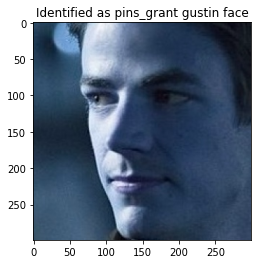

In [92]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction =svm.predict([pca_Xtest[example_idx]])  #### Add your code here ####
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');